<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw4_bsm_calibration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective is to get familiar with model calibration.
- download call today's option prices of your favorite stock with maturity $T_1$ and several near the money strikes $(K_1, \ldots, K_n)$.
- compute IV with your bsm price engine for each option price. You are going to use USD Libor 3-month for your interest rate input. 
- plot a figure of strike v.s. IV. Do you find any volatility smile? 
- calibrate bsm volatility for the option prices, denote it by $\hat \sigma$. You may use any error function for the calibration purpose.
- reproduce option prices using your price engine with calibrated volatility, then compare how close they are to the market prices.


Options Chosen

- Options for Amazon AMZN on 02/05/2019

- Market Price 1658.81

- Maturity on 04/18/2019

In [1]:
'''======
run once, then comment it off, and run again
========'''
#!git clone https://github.com/hechen2020/19ma573HuixinChen.git

Cloning into '19ma573HuixinChen'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 217 (delta 12), reused 0 (delta 0), pack-reused 176
Receiving objects: 100% (217/217), 305.52 KiB | 7.27 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [1]:
#cd ./19ma573HuixinChen/src/

/content/19ma573HuixinChen/src


In [0]:
from contract_v01 import VanillaOption
from sde_1d_v01 import Gbm_1d
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

In [3]:
'''=========
Time length
============='''
today = np.datetime64('2019-02-05')
maturity = np.datetime64('2019-04-18')
time_to_maturity_days = maturity - today

time_to_maturity_years = time_to_maturity_days/np.timedelta64(1,'D')/365
print('--->>>>>time to maturity in years is ' + str(time_to_maturity_years))

--->>>>>time to maturity in years is 0.19726027397260273


In [4]:
'''======
Read data
========='''
#Read four-column data
#columns are otype, maturity, strike, option_price

#call options
np_option_data1 = np.loadtxt('option_list21.dat', comments='#', delimiter=',')

print('>>>>>>option_type, maturity, strike, option_price')
print(np_option_data1)


#put options
np_option_data2 = np.loadtxt('option_list22.dat', comments='#', delimiter=',')

print('>>>>>>option_type, maturity, strike, option_price')
print(np_option_data2)

>>>>>>option_type, maturity, strike, option_price
[[1.00000000e+00 1.97260274e-01 1.62500000e+03 1.03450000e+02]
 [1.00000000e+00 1.97260274e-01 1.63500000e+03 9.75000000e+01]
 [1.00000000e+00 1.97260274e-01 1.64000000e+03 9.40000000e+01]
 [1.00000000e+00 1.97260274e-01 1.64500000e+03 9.26000000e+01]
 [1.00000000e+00 1.97260274e-01 1.65500000e+03 8.60000000e+01]
 [1.00000000e+00 1.97260274e-01 1.66000000e+03 8.37200000e+01]
 [1.00000000e+00 1.97260274e-01 1.66500000e+03 8.15000000e+01]
 [1.00000000e+00 1.97260274e-01 1.67500000e+03 7.75200000e+01]
 [1.00000000e+00 1.97260274e-01 1.68000000e+03 7.33600000e+01]
 [1.00000000e+00 1.97260274e-01 1.68500000e+03 7.47500000e+01]]
>>>>>>option_type, maturity, strike, option_price
[[-1.00000000e+00  1.97260274e-01  1.62500000e+03  6.09200000e+01]
 [-1.00000000e+00  1.97260274e-01  1.63500000e+03  6.55200000e+01]
 [-1.00000000e+00  1.97260274e-01  1.64000000e+03  6.76400000e+01]
 [-1.00000000e+00  1.97260274e-01  1.64500000e+03  6.98800000e+01]
 

In [0]:
'''==============
below are from the market data for underlying process
================='''
gbm1 = Gbm_1d(
    init_state = 1658.81, #market price for Amazon stock
    drift_ratio = 0.0273438, #3-month LIBOR rate
    vol_ratio = .1 #initial guess of volatility
)

In [6]:
num_row = np_option_data1.shape[0]
option_list1 = []
option_list2 = []

for i in range(num_row):
    optioni = VanillaOption(
        otype = np_option_data1[i,0],
        maturity = np_option_data1[i,1],
        strike = np_option_data1[i,2],
        market_price = np_option_data1[i,3]
    )
    option_list1.append(optioni)
for i in range(num_row):
    optioni = VanillaOption(
        otype = np_option_data2[i,0],
        maturity = np_option_data2[i,1],
        strike = np_option_data2[i,2],
        market_price = np_option_data2[i,3]
    )
    option_list2.append(optioni)
      

#testing
print(option_list1)
print(option_list2)
print(option_list1[0].market_price)

[<contract_v01.VanillaOption object at 0x7fd40d605320>, <contract_v01.VanillaOption object at 0x7fd40d605358>, <contract_v01.VanillaOption object at 0x7fd40d605390>, <contract_v01.VanillaOption object at 0x7fd40d6053c8>, <contract_v01.VanillaOption object at 0x7fd40d605400>, <contract_v01.VanillaOption object at 0x7fd40d605438>, <contract_v01.VanillaOption object at 0x7fd40d605470>, <contract_v01.VanillaOption object at 0x7fd40d6054a8>, <contract_v01.VanillaOption object at 0x7fd40d6054e0>, <contract_v01.VanillaOption object at 0x7fd40d605518>]
[<contract_v01.VanillaOption object at 0x7fd40d6052b0>, <contract_v01.VanillaOption object at 0x7fd40d605588>, <contract_v01.VanillaOption object at 0x7fd40d6055c0>, <contract_v01.VanillaOption object at 0x7fd40d6055f8>, <contract_v01.VanillaOption object at 0x7fd40d605630>, <contract_v01.VanillaOption object at 0x7fd40d605668>, <contract_v01.VanillaOption object at 0x7fd40d6056a0>, <contract_v01.VanillaOption object at 0x7fd40d6056d8>, <contrac

In [0]:
np_option_data12 = np.append(np_option_data1, np.zeros([num_row,1]), axis = 1)
np_option_data22 = np.append(np_option_data2, np.zeros([num_row,1]), axis = 1)

In [0]:
'''==========
define a method for error function
============'''

def error_function(vol, gbm, option):
  gbm.vol_ratio = vol
  return np.sqrt(((option.market_price - gbm.bsm_price(option))/gbm.bsm_price(option))**2)#ssre

'''==========
define a method to seek for an implied volatility
============'''

def implied_volatility(gbm, option):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, args = (gbm, option), disp = 0)[0]

In [9]:
#compute implied vols and add them into the last column
for i in range(num_row):
  np_option_data12[i,4] = implied_volatility(gbm1, option_list1[i])
  np_option_data22[i,4] = implied_volatility(gbm1, option_list2[i])
  
print('>>>>>>otype, maturity, strike, option_price, implied vol')
print(np_option_data12)
print(np_option_data22)

>>>>>>otype, maturity, strike, option_price, implied vol
[[1.00000000e+00 1.97260274e-01 1.62500000e+03 1.03450000e+02
  2.77265625e-01]
 [1.00000000e+00 1.97260274e-01 1.63500000e+03 9.75000000e+01
  2.75546875e-01]
 [1.00000000e+00 1.97260274e-01 1.64000000e+03 9.40000000e+01
  2.72656250e-01]
 [1.00000000e+00 1.97260274e-01 1.64500000e+03 9.26000000e+01
  2.76875000e-01]
 [1.00000000e+00 1.97260274e-01 1.65500000e+03 8.60000000e+01
  2.71640625e-01]
 [1.00000000e+00 1.97260274e-01 1.66000000e+03 8.37200000e+01
  2.72265625e-01]
 [1.00000000e+00 1.97260274e-01 1.66500000e+03 8.15000000e+01
  2.72968750e-01]
 [1.00000000e+00 1.97260274e-01 1.67500000e+03 7.75200000e+01
  2.75390625e-01]
 [1.00000000e+00 1.97260274e-01 1.68000000e+03 7.33600000e+01
  2.68906250e-01]
 [1.00000000e+00 1.97260274e-01 1.68500000e+03 7.47500000e+01
  2.81250000e-01]]
[[-1.00000000e+00  1.97260274e-01  1.62500000e+03  6.09200000e+01
   2.77343750e-01]
 [-1.00000000e+00  1.97260274e-01  1.63500000e+03  6.5520

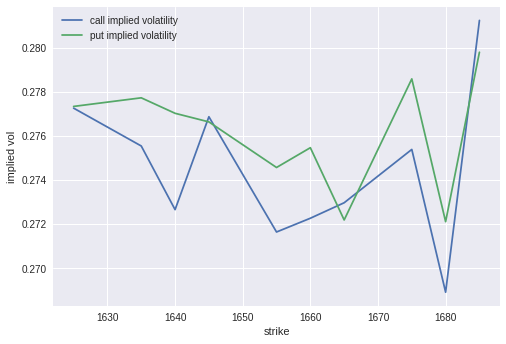

In [10]:
plt.plot(np_option_data12[:,2], np_option_data12[:,4], label = 'call implied volatility')
plt.plot(np_option_data22[:,2], np_option_data22[:,4], label = 'put implied volatility')
plt.ylabel('implied vol')
plt.xlabel('strike')
plt.legend();

somewhat of a smile, with many ups and downs

In [0]:
'''==========
define a method to seek for a calibrated volatility
============'''

def bsm_calibration(gbm, option_list):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, 
                 args = (gbm, option_list[i]), disp = 0)[0]


In [12]:
calibrated_volatility1 = bsm_calibration(gbm1,option_list1)
print('>>>>>>>> calibrated volatility for call is ' + str(calibrated_volatility1))

calibrated_volatility2 = bsm_calibration(gbm1,option_list2)
print('>>>>>>>> calibrated volatility for put is ' + str(calibrated_volatility2))

>>>>>>>> calibrated volatility for call is 0.28125000000000067
>>>>>>>> calibrated volatility for put is 0.2798046875000007


In [13]:
gbm1.vol_ratio = calibrated_volatility1

#find calibrated option price
option_list1_calibrated_price = [gbm1.bsm_price(option_list1[i]) for i in range(len(option_list1))]
print('>>>>>>>>> this is option price calculated from calibrated vol')
option_list1_calibrated_price

>>>>>>>>> this is option price calculated from calibrated vol


[104.5828925640966,
 99.13090024934627,
 96.47742845216953,
 93.87225182526606,
 88.80644996348462,
 86.34558786475816,
 83.93254812961652,
 79.24916528763822,
 76.97837231009873,
 74.75450318116623]

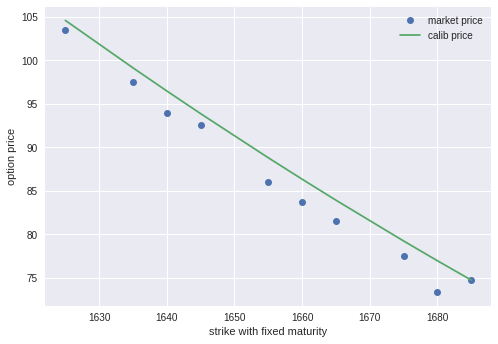

In [14]:
x_co = [option_list1[i].strike for i in range(len(option_list1))]
y_co = [option_list1[i].market_price for i in range(len(option_list1))]
plt.plot(x_co, y_co, 'o', label='market price')

y_co = option_list1_calibrated_price
plt.plot(x_co, y_co, label = 'calib price')

plt.ylabel('option price')
plt.xlabel('strike with fixed maturity')
plt.legend();

In [15]:
gbm1.vol_ratio = calibrated_volatility2

#find calibrated option price
option_list2_calibrated_price = [gbm1.bsm_price(option_list2[i]) for i in range(len(option_list2))]
print('>>>>>>>>> this is option price calculated from calibrated vol')
option_list2_calibrated_price

>>>>>>>>> this is option price calculated from calibrated vol


[61.621987448544814,
 66.11120632699465,
 68.42870557411527,
 70.79474585569324,
 75.672119380102,
 78.18321662701737,
 80.74238384844739,
 86.00415468941515,
 88.70630585719982,
 91.45562334231636]

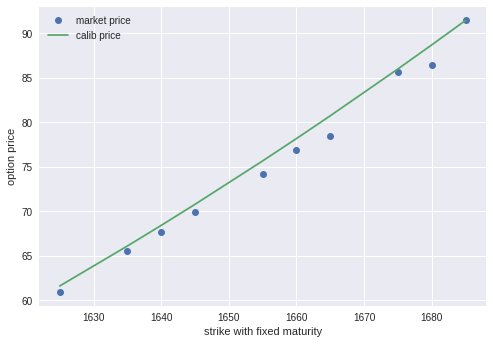

In [16]:
x_co = [option_list2[i].strike for i in range(len(option_list2))]
y_co = [option_list2[i].market_price for i in range(len(option_list2))]
plt.plot(x_co, y_co, 'o', label='market price')

y_co = option_list2_calibrated_price
plt.plot(x_co, y_co, label = 'calib price')

plt.ylabel('option price')
plt.xlabel('strike with fixed maturity')
plt.legend();

The calibrated prices are closer this time to the market prices, reason?